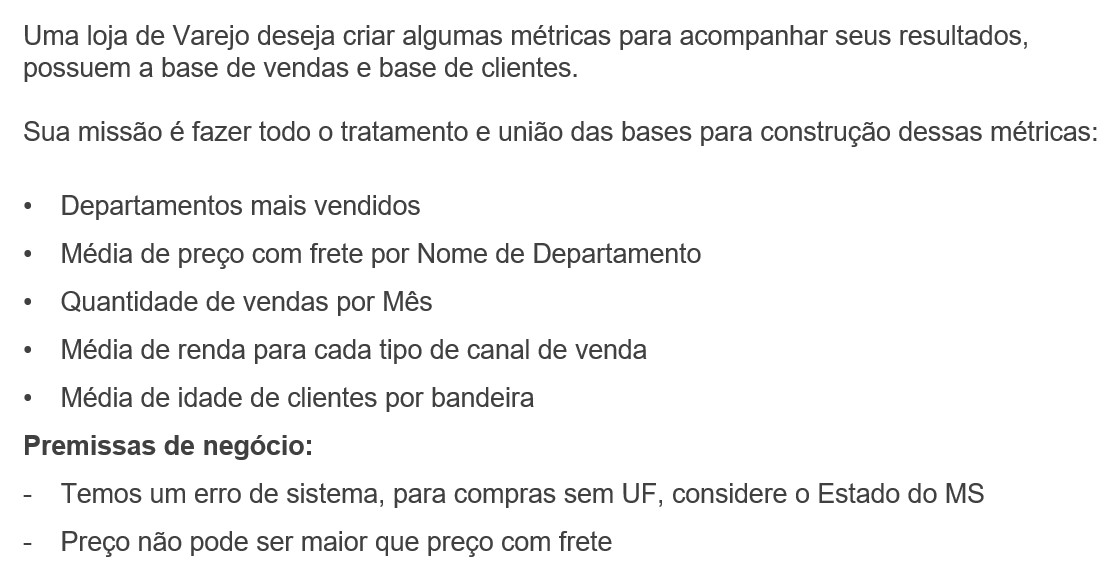

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
vendas = pd.read_excel('/content/varejo.xlsx')
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


In [3]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [4]:
# Agrupando pela quantidade de valores unicos dentro de uma coluna
# diferente de dar um agg() que vai agregar por uma soma ou mean
vendas.groupby('idcanalvenda').idcompra.nunique()

idcanalvenda
APP             139
Aplicativo    21425
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

In [5]:
# Colocando todas as vendas de APP dentro de aplicativo
vendas['idcanalvenda'] = vendas['idcanalvenda'].str.replace('APP', 'Aplicativo')
vendas.groupby('idcanalvenda').idcompra.nunique()

idcanalvenda
Aplicativo    21539
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

In [6]:
vendas.groupby('Nome_Departamento').idcompra.nunique()

Nome_Departamento
Acessorios e Inovacoes     3548
Alimentos                     2
Ar e Ventilacao             951
Audio                      1794
Automotivo                  895
Bebes                      4531
Beleza e Saude             4626
Brinquedos                 1320
Cama, Mesa e Banho          153
Casa e Construcao           263
Cine e Foto                  11
Decoracao                   134
Eletrodomesticos          10501
Eletroportateis            9593
Esporte e Lazer             531
Ferramentas                1111
Games                       764
Informatica                5290
Instrumentos Musicais         1
Linha Industrial             86
Malas e Mochilas            114
Moda                          3
Moveis                     4175
Perfumaria                  624
Pet Shop                     43
Produtos de Limpeza         713
Relogios                    134
TV e Video                    5
TVs e Acessorios           5326
Tablets                    1770
Telefones e Celulares 

In [7]:
vendas['Nome_Departamento'] = vendas['Nome_Departamento'].str.replace('', "")
vendas.groupby('Nome_Departamento').idcompra.nunique()

Nome_Departamento
Acessorios e Inovacoes     3548
Alimentos                     2
Ar e Ventilacao             951
Audio                      1794
Automotivo                  895
Bebes                      4531
Beleza e Saude             4626
Brinquedos                 1320
Cama, Mesa e Banho          153
Casa e Construcao           263
Cine e Foto                  11
Decoracao                   134
Eletrodomesticos          10501
Eletroportateis            9593
Esporte e Lazer             531
Ferramentas                1111
Games                       764
Informatica                5290
Instrumentos Musicais         1
Linha Industrial             86
Malas e Mochilas            114
Moda                          3
Moveis                     4175
Perfumaria                  624
Pet Shop                     43
Produtos de Limpeza         713
Relogios                    134
TV e Video                    5
TVs e Acessorios           5326
Tablets                    1770
Telefones e Celulares 

#Tratando nulos

In [8]:
vendas[vendas['estado'].isnull()]

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones e Celulares,NaN,5804
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar e Ventilacao,NaN,16359
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar e Ventilacao,NaN,13691
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,NaN,13024
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones e Celulares,NaN,9121
...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,NaN,339.912,Eletroportateis,NaN,20873
78718,320895,Mobile,B,2023-01-20,NaN,1000.800,Telefones e Celulares,NaN,17772
79465,389240,Aplicativo,A,2023-01-14,NaN,279.200,Eletrodomesticos,NaN,20399
79548,124585,Mobile,A,2023-04-21,NaN,2051.240,TVs e Acessorios,NaN,17784


In [9]:
# Formas de tratar
# - eliminar toda a linha
vendas_sem_nulos = vendas.dropna()
vendas_sem_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79926 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           79926 non-null  int64         
 1   idcanalvenda       79926 non-null  object        
 2   bandeira           79926 non-null  object        
 3   Data               79926 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    79926 non-null  float64       
 6   Nome_Departamento  79926 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        79926 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 6.1+ MB


In [10]:
# Substituir os nulos por MS
# o inplace só vai economizar código, pq faz o vendas['estado'] = vendas['estado'].fillna('MS', inplace = True)
vendas['estado'].fillna('MS', inplace = True)

In [11]:
media_preco = vendas['Preço'].mean()
vendas['Preço'].fillna(media_preco, inplace = True)
print(media_preco)

906.5891285439033


In [12]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


# Filtrando os dados

In [13]:
vendas[['Preço', 'Preço_com_frete']].describe()

,Preço,Preço_com_frete
count,80228.000000,80228.000000
mean,906.589129,908.619823
std,1057.611490,1057.583101
min,6.320000,6.320000
25%,147.920000,150.706000
50%,532.448000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


In [14]:
# Verificandou uma das regras de negocio, se preço é maior que preço com frete
preco_errado = vendas.query('Preço> Preço_com_frete')
display(preco_errado)

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560000,791.280,Telefones e Celulares,SP,15042
96,382380,Internet,A,2023-04-26,906.589129,879.200,Telefones e Celulares,MS,5804
118,106845,Mobile,A,2023-03-04,658.400000,329.200,Eletroportateis,BA,14702
119,107130,Mobile,A,2023-04-24,2398.400000,1207.120,Eletrodomesticos,SC,26746
120,165450,Mobile,A,2023-04-17,612.960000,317.128,Bebes,SP,11677
...,...,...,...,...,...,...,...,...,...
77383,52430,Internet,B,2023-04-10,906.589129,159.992,Eletroportateis,MS,8647
77454,398005,Mobile,B,2023-01-06,906.589129,386.800,Eletrodomesticos,MS,10108
77807,281255,Aplicativo,A,2023-04-26,906.589129,303.920,Eletroportateis,MS,14347
78610,399680,Aplicativo,A,2023-04-19,906.589129,339.912,Eletroportateis,MS,20873


In [15]:
# Eliminando essas linhas
# Uma busca somente nos itens que estão ok
vendas_correto = vendas.query('Preço< Preço_com_frete')
vendas_correto.describe()

,idcompra,Preço,Preço_com_frete,cliente_Log
count,22047.000000,22047.000000,22047.000000,22047.000000
mean,253799.955550,549.518401,567.332688,13856.313013
std,144794.628563,846.295127,863.458763,8049.120135
min,25.000000,8.720000,9.512000,1.000000
25%,127670.000000,93.528000,100.800000,6858.000000
50%,257885.000000,183.200000,193.912000,13845.000000
75%,379705.000000,661.680000,676.736000,20801.000000
max,499960.000000,14391.200000,14407.120000,27982.000000


In [16]:
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


In [17]:
vendas_correto.query("Nome_Departamento =='Esporte_e_Lazer' and estado =='SP' ").describe()

,idcompra,Preço,Preço_com_frete,cliente_Log
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


In [18]:
# Respondendo umas das métricas com Groupby
# Departamento que venderam mais
departamentos = round(vendas_correto.groupby('Nome_Departamento')['Preço_com_frete'].agg('mean').sort_values(ascending= False).reset_index(), 2)
display(departamentos)

,Nome_Departamento,Preço_com_frete
0,TVs e Acessorios,3469.38
1,Informatica,2159.78
2,Linha Industrial,2027.11
3,Cine e Foto,1851.20
4,Telefones e Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte e Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos Musicais,834.61


In [19]:
# Departamento mais vendidos
vendas_correto.groupby('Nome_Departamento').idcompra.nunique().sort_values(ascending= False).reset_index()

,Nome_Departamento,idcompra
0,Bebes,4353
1,Eletrodomesticos,4201
2,Eletroportateis,2223
3,Moveis,2036
4,Utilidades Domesticas,1366
5,Acessorios e Inovacoes,1243
6,Beleza e Saude,1054
7,Brinquedos,686
8,Perfumaria,563
9,Produtos de Limpeza,522


In [20]:
# Quantidade de vendas por Data
vendas_correto.groupby('Data').idcompra.nunique().sort_values(ascending= False).reset_index()

,Data,idcompra
0,2023-02-13,226
1,2023-01-20,218
2,2023-03-07,215
3,2023-03-30,214
4,2023-02-20,214
...,...,...
114,2023-02-15,162
115,2023-04-04,162
116,2023-02-25,161
117,2023-02-22,156


In [21]:
# Para pegar por mês, vamos criar uma nova coluna e ela vai ser onde vamos fazer a pesquisa
vendas_correto['mes'] = vendas_correto['Data'].dt.month
vendas_correto.head()

<ipython-input-21-dd7f774e362d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas_correto['mes'] = vendas_correto['Data'].dt.month


,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mes
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte e Lazer,RS,19790,3
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,3
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,2


In [22]:
# Quantidade de vendas por Data
vendas_correto.groupby('mes').idcompra.nunique().sort_values(ascending= False).reset_index()

,mes,idcompra
0,3,5590
1,4,5454
2,1,5309
3,2,5138


#Join

In [23]:
cliente =  pd.read_excel('/content/cliente_varejo.xlsx')
cliente.head()
# Cliente log temos nas duas tabelas, ou seja, podemos fazer a união dessas tabelas

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


In [25]:
cliente[['idade', 'renda']].describe()

,idade,renda
count,26425.000000,26425.000000
mean,53.412564,8241.470350
std,20.698825,3899.871482
min,18.000000,1500.000000
25%,35.000000,4859.000000
50%,53.000000,8234.000000
75%,71.000000,11629.000000
max,89.000000,15000.000000


In [26]:
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cliente_Log  26425 non-null  int64
 1   idade        26425 non-null  int64
 2   renda        26425 non-null  int64
dtypes: int64(3)
memory usage: 619.5 KB


In [27]:
# Transformando para float a renda
cliente.astype({'renda': 'float'})

,cliente_Log,idade,renda
0,15042,89,11337.0
1,17590,54,2050.0
2,15478,47,8258.0
3,2933,39,4671.0
4,19790,26,9207.0
...,...,...,...
26420,20177,48,3132.0
26421,23977,31,5108.0
26422,25398,35,13136.0
26423,26390,50,12304.0


# Unindo tabelas

In [30]:
# Merge vai unir as tabelas da maneira que vc pedir, ao final passar a coluna que é igual nos 2
vendas_cliente = vendas_correto.merge(cliente, how='left', on='cliente_Log')
vendas_cliente.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mes,idade,renda
0,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3,47,8258
1,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte e Lazer,RS,19790,3,26,9207
2,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte e Lazer,RS,19790,3,58,9204
3,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte e Lazer,RS,19790,3,48,2796
4,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2,78,6596


In [37]:
media_venda_canal = round(vendas_cliente.groupby('idcanalvenda')['renda'].agg('mean').sort_values(ascending=False).reset_index(),2)
display(media_venda_canal)

,idcanalvenda,renda
0,Aplicativo,8244.85
1,Mobile,8222.72
2,Internet,8211.84


In [39]:
# Media de idade de clientes por bandeira
media_idade_bandeira = round(vendas_cliente.groupby('bandeira')['idade'].agg('mean').sort_values(ascending= False).reset_index(),2)
media_idade_bandeira

,bandeira,idade
0,A,53.30
1,B,53.29


#Visualizando com gráficos

In [40]:
import matplotlib.pyplot as plt

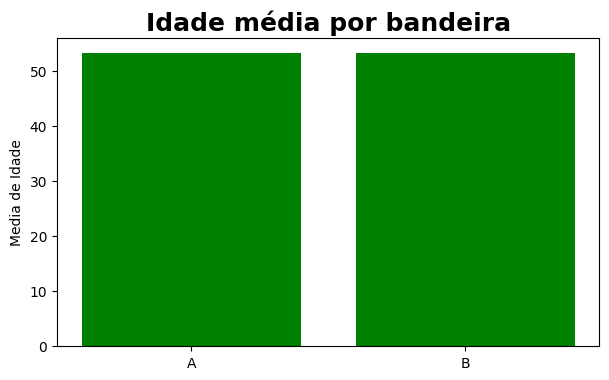

In [43]:
# ajustando o tamanho da figura
fig = plt.figure(figsize=(7,4))

# PAssando os eixos x e Y
plt.bar(media_idade_bandeira['bandeira'], media_idade_bandeira['idade'], color='green')

plt.ylabel('Media de Idade')
plt.title('Idade média por bandeira', loc='center', fontsize= 18, fontweight='bold', color='black');


Text(0.5, 1.0, 'Renda média por canal de venda')

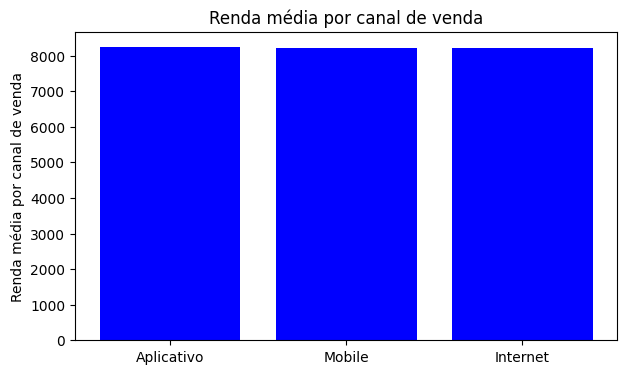

In [46]:
fig = plt.figure(figsize=(7,4))

plt.bar(media_venda_canal['idcanalvenda'], media_venda_canal['renda'],color='blue')

plt.ylabel('Renda média por canal de venda')

plt.title('Renda média por canal de venda')

Text(0.5, 1.0, 'Vendas por data')

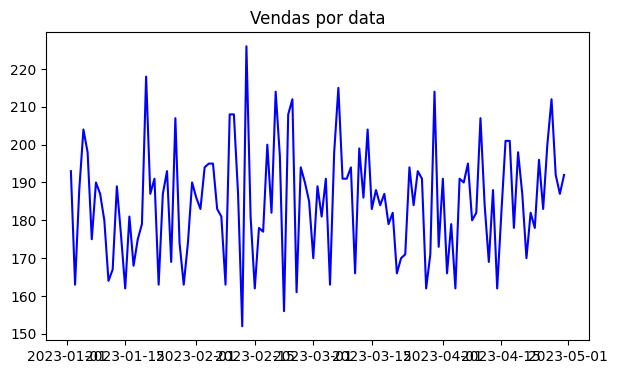

In [56]:
# Quantidade de vendas por Data
vendas_agg = vendas_correto.groupby('Data').idcompra.nunique().reset_index()

fig = plt.figure(figsize=(7,4))
x =vendas_agg['Data']
y = vendas_agg['idcompra']

plt.plot(x,y, color='blue')

plt.title('Vendas por data')


#Plotly

In [57]:
%pip install ploty
%pip install cufflinks
%pip install chart-studio

ERROR: Could not find a version that satisfies the requirement ploty (from versions: none)
ERROR: No matching distribution found for ploty
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 847.6 kB/s eta 0:00:00


In [58]:
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px

In [59]:
# media de idade por bandeira

px.bar(media_idade_bandeira, x= 'bandeira', y='idade')

In [60]:
px.line(vendas_agg, x= 'Data', y='idcompra')